# Постановка задачи
Данный датасет основывается на данных, собранные о настольных играх с веб-сайта BoardGameGeek (BGG) в феврале 2021 года. BGG — это крупнейшая онлайн-коллекция данных о настольных играх, которая состоит из данных о более чем 100 000 игр (с рейтингом и без рейтинга).

Этот набор данных содержит все рейтинговые игры (около 20 000, т. е. все игры, имеющие рейтинг) на момент сбора из базы данных BGG.

В данном соревновании вам необходимо разработать алгоритм, который сможет предсказывать **средний рейтинг игры (Rating Average)**.

# Описание датасета (Признаки)
ID - Идентификатор настольной игры

Name - Имя

Year Published - Год публикации

Min Players - Рекомендуемое минимальное количество игроков

Max Players - Рекомендуемое максимальное количество игроков

Play Time - Время игры

Min Age - Рекомендуемый минимальный возраст игроков

Users Rated - Количество пользователей, оценивших игру

**Rating Average - Средний рейтинг, полученный игрой (целевая переменная)**

BGG Rank - Рейтинг от BGG

Complexity Average - Среднее значение сложности игры

Owned Users - Количество зарегистрированных BGG владельцев игры

Mechanics - Механика, используемая в игре

Domains - Домены настольных игр, которым принадлежит игра

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer

Проведем первичный анализ датасета. Считаем файл, выведем первые 10 строк

In [109]:
df = pd.read_csv('train_data.csv')
df.head(10)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
2,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
3,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
4,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,"8,87",6,"3,55",21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"
5,182028.0,Through the Ages: A New Story of Civilization,2015.0,2,4,120,14,23061,"8,43",7,"4,41",26985.0,"Action Points, Auction/Bidding, Auction: Dutch...",Strategy Games
6,220308.0,Gaia Project,2017.0,1,4,150,12,16352,"8,49",8,"4,35",20312.0,"End Game Bonuses, Hexagon Grid, Income, Modula...",Strategy Games
7,187645.0,Star Wars: Rebellion,2016.0,2,4,240,14,23081,"8,42",9,"3,71",34849.0,"Area Majority / Influence, Area Movement, Area...",Thematic Games
8,193738.0,Great Western Trail,2016.0,2,4,150,12,29457,"8,30",11,"3,71",35804.0,"Deck Bag and Pool Building, Hand Management, O...",Strategy Games
9,162886.0,Spirit Island,2017.0,1,4,120,13,25722,"8,35",13,"4,01",38254.0,"Action Retrieval, Area Majority / Influence, C...",Strategy Games


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15257 entries, 0 to 15256
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15247 non-null  float64
 1   Name                15257 non-null  object 
 2   Year Published      15256 non-null  float64
 3   Min Players         15257 non-null  int64  
 4   Max Players         15257 non-null  int64  
 5   Play Time           15257 non-null  int64  
 6   Min Age             15257 non-null  int64  
 7   Users Rated         15257 non-null  int64  
 8   Rating Average      15257 non-null  object 
 9   BGG Rank            15257 non-null  int64  
 10  Complexity Average  15257 non-null  object 
 11  Owned Users         15240 non-null  float64
 12  Mechanics           14057 non-null  object 
 13  Domains             7608 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


Видим, что среди численных переменных всего у двух есть незначительное количество пропусков, поэтому целесообразно их заполнить. Также можно заметить, что фактически численные признаки Complexity Average и Rating Average записаны как строки. Преобразуем эти признаки к численному типу.

In [111]:
df['Complexity Average'] = df['Complexity Average'].str.replace(',', '.').astype(float)
df['Rating Average'] = df['Rating Average'].str.replace(',', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15257 entries, 0 to 15256
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15247 non-null  float64
 1   Name                15257 non-null  object 
 2   Year Published      15256 non-null  float64
 3   Min Players         15257 non-null  int64  
 4   Max Players         15257 non-null  int64  
 5   Play Time           15257 non-null  int64  
 6   Min Age             15257 non-null  int64  
 7   Users Rated         15257 non-null  int64  
 8   Rating Average      15257 non-null  float64
 9   BGG Rank            15257 non-null  int64  
 10  Complexity Average  15257 non-null  float64
 11  Owned Users         15240 non-null  float64
 12  Mechanics           14057 non-null  object 
 13  Domains             7608 non-null   object 
dtypes: float64(5), int64(6), object(3)
memory usage: 1.6+ MB


Заполним пропуски в столбцах 'Year Published' и 'Owned Users' медианами (сохраним их в отдельную переменную, чтобы можно было использовать их при заполнении пропусков в тестовом датасете)

In [112]:
year_median = df['Year Published'].median()
users_median = df['Owned Users'].median()
df['Year Published'] = df['Year Published'].fillna(year_median)
df['Owned Users'] = df['Owned Users'].fillna(users_median)
df_2 = df.copy()
df_3 = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15257 entries, 0 to 15256
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15247 non-null  float64
 1   Name                15257 non-null  object 
 2   Year Published      15257 non-null  float64
 3   Min Players         15257 non-null  int64  
 4   Max Players         15257 non-null  int64  
 5   Play Time           15257 non-null  int64  
 6   Min Age             15257 non-null  int64  
 7   Users Rated         15257 non-null  int64  
 8   Rating Average      15257 non-null  float64
 9   BGG Rank            15257 non-null  int64  
 10  Complexity Average  15257 non-null  float64
 11  Owned Users         15257 non-null  float64
 12  Mechanics           14057 non-null  object 
 13  Domains             7608 non-null   object 
dtypes: float64(5), int64(6), object(3)
memory usage: 1.6+ MB


In [114]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,15247.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000,15257.000000
mean,108221.590214,1984.145900,2.021236,5.642918,92.801337,9.581766,819.530773,6.399775,10186.327784,1.991064,1371.024055
std,98862.566448,211.718852,0.696323,12.551944,607.611378,3.671560,3286.396397,0.936488,5863.744570,0.848816,4678.822616
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,10907.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5103.000000,1.330000,146.000000
50%,88316.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,119.000000,6.430000,10171.000000,2.000000,308.000000
75%,193045.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,379.000000,7.020000,15280.000000,2.540000,855.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


Далее выбираем числовые признаки, удаляем целевую переменную и столбец 'ID'. Также масштабируем данные

In [115]:
df = df.select_dtypes(include=np.number)

In [117]:
X = df.drop(columns=['Rating Average', 'ID'])
y = df['Rating Average']

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

model = LinearRegression()
model.fit(X_norm, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
df_test = pd.read_csv('test_data.csv')
df_test.head(10)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
1,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,10,"3,59",56219.0,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames"
2,115746.0,War of the Ring: Second Edition,2012.0,2,4,180,13,13725,12,"4,14",22281.0,"Area Majority / Influence, Area Movement, Camp...","Thematic Games, Wargames"
3,169786.0,Scythe,2016.0,1,5,115,14,57871,14,"3,41",75640.0,"Area Majority / Influence, Card Play Conflict ...",Strategy Games
4,28720.0,Brass: Lancashire,2007.0,2,4,120,14,19400,19,"3,86",25429.0,"Hand Management, Income, Loans, Network and Ro...",Strategy Games
5,177736.0,A Feast for Odin,2016.0,1,4,120,12,17377,21,"3,84",22794.0,"Automatic Resource Growth, Dice Rolling, Grid ...",Strategy Games
6,167355.0,Nemesis,2018.0,1,5,180,12,12290,24,"3,35",17574.0,"Campaign / Battle Card Driven, Cooperative Gam...",Thematic Games
7,96848.0,Mage Knight Board Game,2011.0,1,4,240,14,27850,26,"4,31",39421.0,"Card Drafting, Cooperative Game, Deck Bag and ...","Strategy Games, Thematic Games"
8,237182.0,Root,2018.0,2,4,90,10,24412,27,"3,67",37715.0,"Action Queue, Action Retrieval, Area Majority ...","Strategy Games, Wargames"
9,276025.0,Maracaibo,2019.0,1,4,120,12,7645,37,"3,87",12042.0,"Contracts, End Game Bonuses, Events, Hand Mana...",Strategy Games


In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5080 non-null   float64
 1   Name                5086 non-null   object 
 2   Year Published      5086 non-null   float64
 3   Min Players         5086 non-null   int64  
 4   Max Players         5086 non-null   int64  
 5   Play Time           5086 non-null   int64  
 6   Min Age             5086 non-null   int64  
 7   Users Rated         5086 non-null   int64  
 8   BGG Rank            5086 non-null   int64  
 9   Complexity Average  5086 non-null   object 
 10  Owned Users         5080 non-null   float64
 11  Mechanics           4688 non-null   object 
 12  Domains             2576 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 516.7+ KB


Проведем аналогичные преобразования тестового датасета: изменим тип данных фактически численных переменных, заполним пропуски в численных данных

In [120]:
df_test['Complexity Average'] = df_test['Complexity Average'].str.replace(',', '.').astype(float)
df_test['Year Published'] = df_test['Year Published'].fillna(year_median)
df_test['Owned Users'] = df_test['Owned Users'].fillna(users_median)
df_test_2 = df_test.copy()
df_test_3 = df_test.copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5080 non-null   float64
 1   Name                5086 non-null   object 
 2   Year Published      5086 non-null   float64
 3   Min Players         5086 non-null   int64  
 4   Max Players         5086 non-null   int64  
 5   Play Time           5086 non-null   int64  
 6   Min Age             5086 non-null   int64  
 7   Users Rated         5086 non-null   int64  
 8   BGG Rank            5086 non-null   int64  
 9   Complexity Average  5086 non-null   float64
 10  Owned Users         5086 non-null   float64
 11  Mechanics           4688 non-null   object 
 12  Domains             2576 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 516.7+ KB


Выбираем численные признаки, удаляем столбец 'ID', масштабируем данные, предсказываем значения целевой переменной

In [121]:
df_test = df_test.select_dtypes(include=np.number)
df_test = df_test.drop(columns='ID')
X_test = df_test
X_norm_test = scaler.transform(X_test)
X_norm_test = pd.DataFrame(X_norm_test, columns=X_test.columns)

y_pred = model.predict(X_norm_test)
print(y_pred)

[6.64826828 7.21025239 7.63159837 ... 5.10923668 5.09537376 5.150854  ]


Сохраняем результат как датасет в требуемом формате

In [122]:
df_pred = pd.DataFrame({
    'index': range(len(y_pred)),
    'Rating Average': y_pred
})
df_pred.to_csv('predictions.csv', index=False)

MSE = 0.36138 ( score на Kaggle)

Попробуем улучшить результат. Посмотрим на матрицу корреляции (в данном случае построим матрицу корреляции Спирмана, так как для корреляции Пирсона обязательно требование нормального распределения)

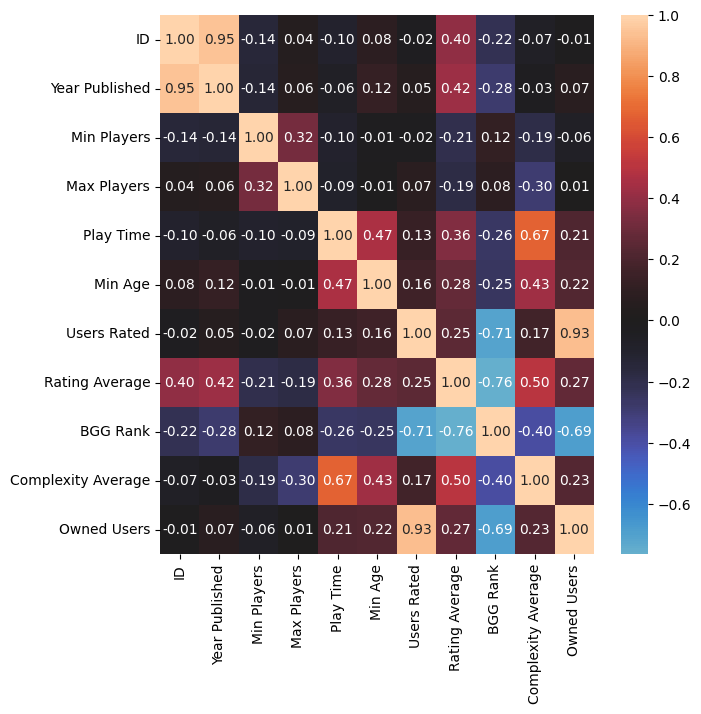

In [123]:
corr = df.corr(numeric_only = True, method='spearman') 
plt.figure(figsize=(7, 7))
sns.heatmap(corr, cmap='icefire', center=0, annot=True, fmt='.2f')
plt.show()

Видим, что имеет место явление мультиколлинеарности, например столбцы Users Rated и Owned Users сильно коррелируют между собой. Оставим Owned (он немного больше коррелирует с целевой переменной), а Users Rated удалим. Также столбец ID коррелирует с Year Published, но его мы удалили в прошлой версии модели.

In [124]:
df_2 = df_2.select_dtypes(include=np.number)

In [125]:
X = df_2.drop(columns=['Rating Average', 'ID', 'Users Rated'])
y = df_2['Rating Average']

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

model = LinearRegression()
model.fit(X_norm, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [126]:
df_test_2 = df_test_2.select_dtypes(include=np.number)
df_test_2 = df_test_2.drop(columns=['ID', 'Users Rated'])
X_test = df_test_2
X_norm_test = scaler.transform(X_test)
X_norm_test = pd.DataFrame(X_norm_test, columns=X_test.columns)

y_pred = model.predict(X_norm_test)
print(y_pred)

[6.81992344 7.11823438 7.70878625 ... 5.08028121 5.07800663 5.09506127]


In [127]:
df_pred = pd.DataFrame({
    'index': range(len(y_pred)),
    'Rating Average': y_pred
})
df_pred.to_csv('predictions_3.csv', index=False)

MSE = 0.36340 (score на Kaggle)